6. Assignment on Regression technique.
Download temperature data from the link below.
https://www.kaggle.com/venky73/temperaturesof-india?select=temperatures.csv
This data consists of temperatures of INDIA averaging the temperatures of all places month
wise. Temperatures values are recorded in CELSIUS

a) Apply Linear Regression using a suitable library function and predict the Month-wise
temperature.

b) Assess the performance of regression models using MSE, MAE and R-Square metrics

c) Visualize a simple regression model.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
temp=pd.read_csv('/content/temperatures.csv')

In [ ]:
temp.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [ ]:
temp.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1959.000000,23.687436,25.597863,29.085983,31.975812,33.565299,32.774274,31.035897,30.507692,30.486752,29.766581,27.285470,24.608291,29.181368,24.629573,31.517607,31.198205,27.208120
std,33.919021,0.834588,1.150757,1.068451,0.889478,0.724905,0.633132,0.468818,0.476312,0.544295,0.705492,0.714518,0.782644,0.555555,0.911239,0.740585,0.420508,0.672003
min,1901.000000,22.000000,22.830000,26.680000,30.010000,31.930000,31.100000,29.760000,29.310000,29.070000,27.900000,25.700000,23.020000,28.110000,22.250000,29.920000,30.240000,25.740000
25%,1930.000000,23.100000,24.780000,28.370000,31.460000,33.110000,32.340000,30.740000,30.180000,30.120000,29.380000,26.790000,24.040000,28.760000,24.110000,31.040000,30.920000,26.700000
50%,1959.000000,23.680000,25.480000,29.040000,31.950000,33.510000,32.730000,31.000000,30.540000,30.520000,29.780000,27.300000,24.660000,29.090000,24.530000,31.470000,31.190000,27.210000
75%,1988.000000,24.180000,26.310000,29.610000,32.420000,34.030000,33.180000,31.330000,30.760000,30.810000,30.170000,27.720000,25.110000,29.470000,25.150000,31.890000,31.400000,27.610000
max,2017.000000,26.940000,29.720000,32.620000,35.380000,35.840000,34.480000,32.760000,31.840000,32.220000,32.290000,30.110000,28.010000,31.630000,28.330000,34.570000,32.410000,30.030000


In [ ]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     117 non-null    int64  
 1   JAN      117 non-null    float64
 2   FEB      117 non-null    float64
 3   MAR      117 non-null    float64
 4   APR      117 non-null    float64
 5   MAY      117 non-null    float64
 6   JUN      117 non-null    float64
 7   JUL      117 non-null    float64
 8   AUG      117 non-null    float64
 9   SEP      117 non-null    float64
 10  OCT      117 non-null    float64
 11  NOV      117 non-null    float64
 12  DEC      117 non-null    float64
 13  ANNUAL   117 non-null    float64
 14  JAN-FEB  117 non-null    float64
 15  MAR-MAY  117 non-null    float64
 16  JUN-SEP  117 non-null    float64
 17  OCT-DEC  117 non-null    float64
dtypes: float64(17), int64(1)
memory usage: 16.6 KB


In [ ]:
temp.shape

(117, 18)

<Axes: title={'center': 'Years vs Jan'}, xlabel='YEAR', ylabel='JAN'>

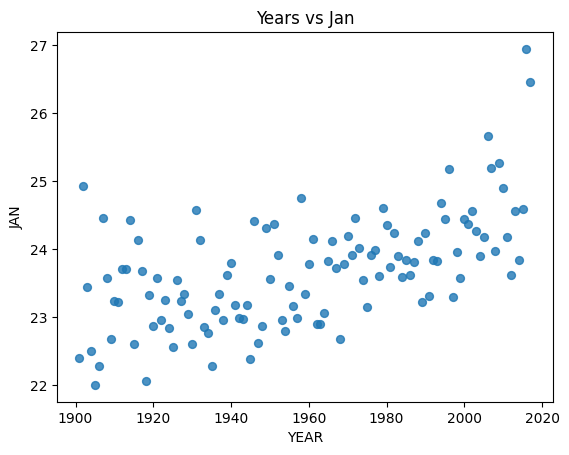

In [ ]:
temp.plot(kind='scatter', x='YEAR', y='JAN', s=32, alpha=.8,title='Years vs Jan')

<Axes: title={'center': 'JAN'}, ylabel='Frequency'>

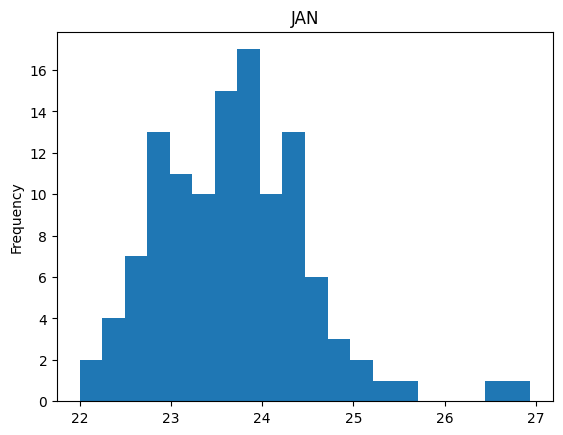

In [ ]:
temp['JAN'].plot(kind='hist', bins=20, title='JAN')


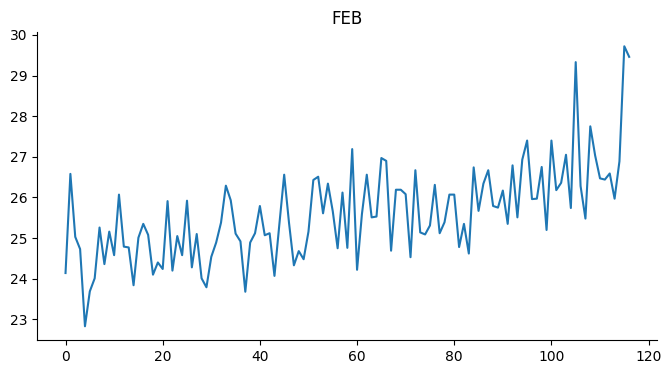

In [ ]:
temp['FEB'].plot(kind='line', figsize=(8, 4), title='FEB')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
x = temp.iloc[:,0:1]
y = temp.iloc[:,13:14]
x_train,x_test, y_train, y_test = train_test_split(x, y,test_size=0.40, random_state=0)
y_test = np.array(y_test)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 1)
(47, 1)
(70, 1)
(47, 1)


In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.array(y_pred)
print(y_pred.shape)

(47, 1)


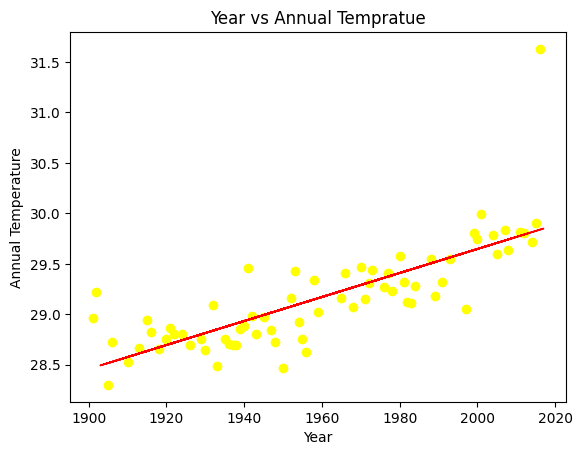

In [ ]:
plt.scatter(x_train, y_train, color='yellow')
plt.plot(x_test, y_pred, color='red', linewidth=1.2)
plt.title("Year vs Annual Tempratue")
plt.xlabel("Year")
plt.ylabel("Annual Temperature")
plt.show()

[Text(0.5, 1.0, 'YEAR VS ANNUAL TEMP')]

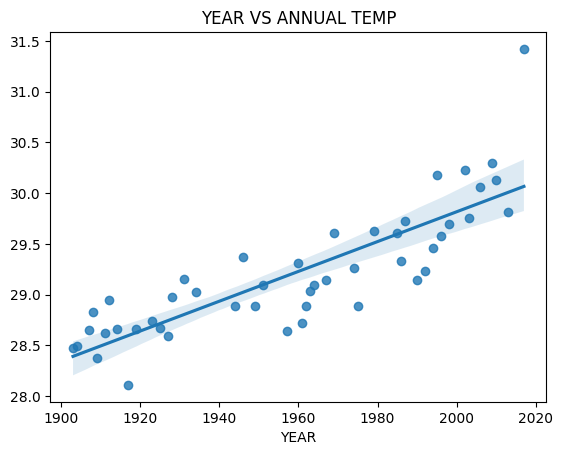

In [ ]:
tempdata=temp
sns.regplot(data=tempdata,x=x_test,y=y_test,).set(title="YEAR VS ANNUAL TEMP")

In [ ]:
print("coefficient:", model.coef_)
print("intercept:",model.intercept_)

coefficient: [[0.01190094]]
intercept: [5.84557702]


In [ ]:
print("Mean Square Error:  ",metrics.mean_squared_error(y_test,y_pred))
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_pred))
print("R-Sqaure : ", metrics.r2_score(y_test,y_pred))

Mean Square Error:   0.12739407224025404
Mean Absolute Error:  0.2467987767427756
R-Sqaure :  0.6672373588443201
